# Introduction

In this notebook, I've used **CNN** to perform Image Classification on the Brain Tumor dataset.<br>
Since this dataset is small, if we train a neural network to it, it won't really give us a good result.<br>
Therefore, I'm going to use the concept of **Transfer Learning** to train the model to get really accurate results.

<img src="https://miro.medium.com/max/2800/1*TUF_YfybJPQ8WA0siWeJTg@2x.jpeg" alt="Brain" style="width: 800px;">

### Note

If you find this notebook helpful and intuitive, feel free to upvote it! Do give me your suggestions or opinions so that I can improve my work! I will highly appreciate it! Thank you! :)

---

In [234]:
# Importing Libraries
# pip install pyqt5 pyqtwebengine requests_mock
# pip install kaggle kagglehub
# pip install pyqt5 pyqtwebengine requests_mock
# pip install opencv-python
# pip install tensorflow 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [221]:
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

# print("Path to dataset files:", path)

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('dataset'):
    print("Folder Name : ", dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


Folder Name :  dataset
Folder Name :  dataset/Testing
Folder Name :  dataset/Testing/meningioma_tumor
dataset/Testing/meningioma_tumor/image(78).jpg
dataset/Testing/meningioma_tumor/image(86).jpg
dataset/Testing/meningioma_tumor/image(59).jpg
dataset/Testing/meningioma_tumor/image(9).jpg
dataset/Testing/meningioma_tumor/image(83).jpg
dataset/Testing/meningioma_tumor/image(100).jpg
dataset/Testing/meningioma_tumor/image(88).jpg
dataset/Testing/meningioma_tumor/image(56).jpg
dataset/Testing/meningioma_tumor/image(47).jpg
dataset/Testing/meningioma_tumor/image(6).jpg
dataset/Testing/meningioma_tumor/image(31).jpg
dataset/Testing/meningioma_tumor/image(50).jpg
dataset/Testing/meningioma_tumor/image(35).jpg
dataset/Testing/meningioma_tumor/image(127).jpg
dataset/Testing/meningioma_tumor/image(106).jpg
dataset/Testing/meningioma_tumor/image(62).jpg
dataset/Testing/meningioma_tumor/image(8).jpg
dataset/Testing/meningioma_tumor/image(16).jpg
dataset/Testing/meningioma_tumor/image(60).jpg
datas

---

# Color

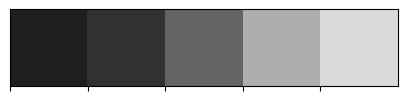

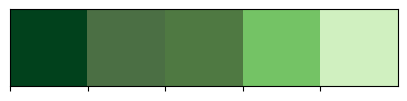

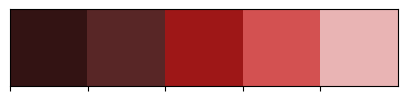

In [236]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

---

# Data Preperation

In [237]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

We start off by appending all the images from the  directories into a Python list and then converting them into numpy arrays after resizing it.

In [248]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('dataset/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)




for i in labels:
    folderPath = os.path.join('dataset/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 74/74 [00:00<00:00, 291.51it/s]


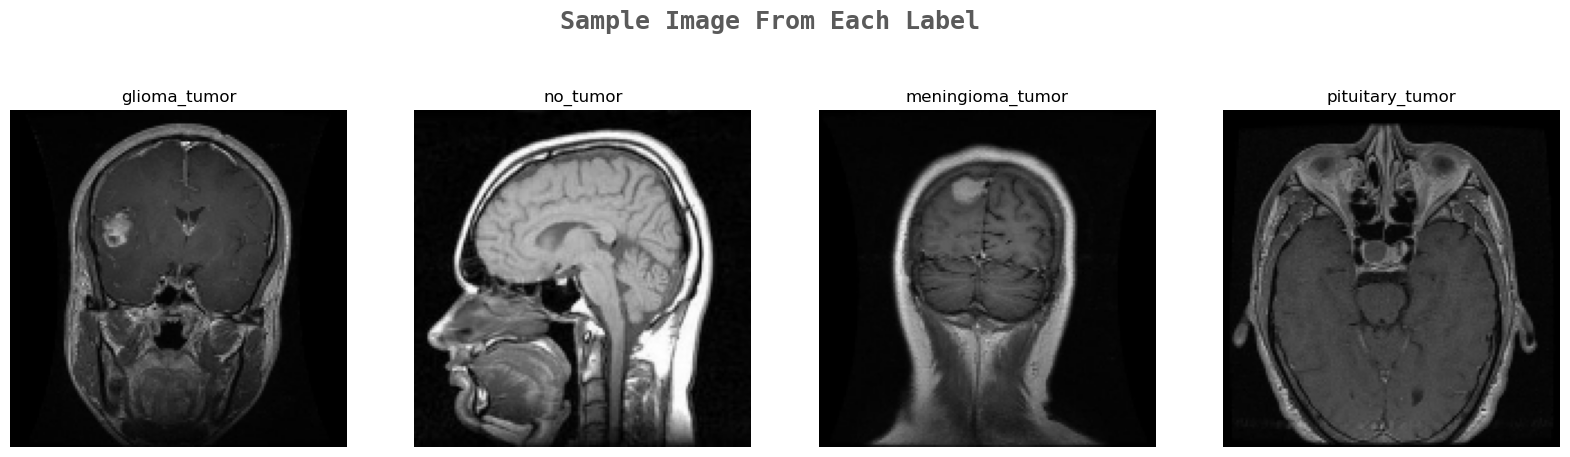

In [159]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [249]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train.shape
X_train.shape
# Dividing the dataset into **Training** and **Testing** sets.
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state = 101)

(3264, 150, 150, 3)

(3264, 150, 150, 3)

Performing **One Hot Encoding** on the labels after converting it into numerical values:

In [250]:
# print(type(y_train))
# print(y_train.shape)
# print(y_train[:5])  # Print the first 5 elements
# 
y_test[:10]

print()
y_train[:10]

for i in y_train[:10]:
    print(i)

array(['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor',
       'pituitary_tumor', 'meningioma_tumor', 'meningioma_tumor',
       'pituitary_tumor', 'meningioma_tumor', 'meningioma_tumor'],
      dtype='<U16')

array(['glioma_tumor', 'no_tumor', 'no_tumor', 'glioma_tumor',
       'pituitary_tumor', 'no_tumor', 'pituitary_tumor', 'no_tumor',
       'no_tumor', 'meningioma_tumor'], dtype='<U16')

glioma_tumor
no_tumor
no_tumor
glioma_tumor
pituitary_tumor
no_tumor
pituitary_tumor
no_tumor
no_tumor
meningioma_tumor


In [241]:
# labels.index(1)
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
print(labels[0])

y_train_new = []
for i in y_train[:4]:
    print(i)

glioma_tumor
glioma_tumor
no_tumor
no_tumor
glioma_tumor


In [251]:
y_train_new = []

y_train_storage = []
y_test_storage = []
for i in y_train:
    index = labels.index(i)
    y_train_new.append(index)
    y_train_storage.append(index)
    print("Index", index, "Value", i)
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    index = labels.index(i)
    y_test_new.append(index)
    y_test_storage.append(index)
    # print("Index", index, "Value", i)
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Index 0 Value glioma_tumor
Index 1 Value no_tumor
Index 1 Value no_tumor
Index 0 Value glioma_tumor
Index 3 Value pituitary_tumor
Index 1 Value no_tumor
Index 3 Value pituitary_tumor
Index 1 Value no_tumor
Index 1 Value no_tumor
Index 2 Value meningioma_tumor
Index 2 Value meningioma_tumor
Index 0 Value glioma_tumor
Index 3 Value pituitary_tumor
Index 2 Value meningioma_tumor
Index 2 Value meningioma_tumor
Index 3 Value pituitary_tumor
Index 1 Value no_tumor
Index 0 Value glioma_tumor
Index 1 Value no_tumor
Index 2 Value meningioma_tumor
Index 2 Value meningioma_tumor
Index 3 Value pituitary_tumor
Index 3 Value pituitary_tumor
Index 2 Value meningioma_tumor
Index 0 Value glioma_tumor
Index 0 Value glioma_tumor
Index 0 Value glioma_tumor
Index 2 Value meningioma_tumor
Index 2 Value meningioma_tumor
Index 3 Value pituitary_tumor
Index 3 Value pituitary_tumor
Index 0 Value glioma_tumor
Index 3 Value pituitary_tumor
Index 3 Value pituitary_tumor
Index 1 Value no_tumor
Index 3 Value pituita

In [253]:
y_train_new[:4]

[0, 1, 1, 0]

---

# Transfer Learning

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

In this notebook, I'll be using the **EfficientNetB0** model which will use the weights from the **ImageNet** dataset.

The include_top parameter is set to *False* so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

In [109]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

**GlobalAveragePooling2D** -> This layer acts similar to the Max Pooling layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while *pooling*. This really helps in decreasing the computational load on the machine while training.
<br><br>
**Dropout** -> This layer omits some of the neurons at each step from the layer making the neurons more independent from the neibouring neurons. It helps in avoiding overfitting. Neurons to be ommitted are selected at random. The **rate** parameter is the liklihood of a neuron activation being set to 0, thus dropping out the neuron

**Dense** -> This is the output layer which classifies the image into 1 of the 4 possible classes. It uses the **softmax** function which is a generalization of the sigmoid function.

In [110]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [111]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 150, 150,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 150, 150,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 150, 150,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

We finally compile our model.

In [112]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

**Callbacks** -> Callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.<br><br>
By definition, "A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training."

In this notebook, I'll be using **TensorBoard, ModelCheckpoint and ReduceLROnPlateau** callback functions

In [114]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

---

# Training The Model

**Note**: The training takes alot of time! ~ 2 hours for me (Using CPU)<br>
Barely took 5 minutes with the GPU.

In [115]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12


2025-02-11 20:23:30.751824: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 178402500 exceeds 10% of free system memory.


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7114 - loss: 0.6985
Epoch 1: val_accuracy improved from -inf to 0.85714, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.7128 - loss: 0.6959 - val_accuracy: 0.8571 - val_loss: 0.6644 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9415 - loss: 0.1665
Epoch 2: val_accuracy improved from 0.85714 to 0.88435, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.9415 - loss: 0.1665 - val_accuracy: 0.8844 - val_loss: 0.3864 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9556 - loss: 0.1388
Epoch 3: val_accuracy improved from 0.88435 to 0.94558, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.9556 - loss: 0.1387 - val_accuracy: 0.9456 - val_loss: 0.2562 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9756 - loss: 0.0732
Epoch 4: val_accuracy did not improve from 0.94558
83/83 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.9755 - loss: 0.0734 - val_accuracy: 0.9150 - val_loss: 0.3471 - learning_rate: 0.0010
Epoch 5/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9768 - loss: 0.0769
Epoch 5: val_accuracy did not improve from 0.94558

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
83/83 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.9768 - loss: 0.0770 - val_accuracy: 0.9388 - val_loss: 0.3005 - learning_rate: 0.0010
Epoch 6/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9860 - loss: 0.0366
Epoch 6: val_accuracy improved from 0.94558 to 0.94898, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 304s 4s/step - accuracy: 0.9860 - loss: 0.0366 - val_accuracy: 0.9490 - val_loss: 0.1933 - learning_rate: 3.0000e-04
Epoch 7/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9941 - loss: 0.0223
Epoch 7: val_accuracy did not improve from 0.94898
83/83 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.9941 - loss: 0.0222 - val_accuracy: 0.9490 - val_loss: 0.2057 - learning_rate: 3.0000e-04
Epoch 8/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9951 - loss: 0.0135
Epoch 8: val_accuracy improved from 0.94898 to 0.96259, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.9951 - loss: 0.0135 - val_accuracy: 0.9626 - val_loss: 0.1378 - learning_rate: 3.0000e-04
Epoch 9/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9958 - loss: 0.0123
Epoch 9: val_accuracy improved from 0.96259 to 0.96599, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.9660 - val_loss: 0.1248 - learning_rate: 3.0000e-04
Epoch 10/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9995 - loss: 0.0060
Epoch 10: val_accuracy improved from 0.96599 to 0.97279, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.9995 - loss: 0.0060 - val_accuracy: 0.9728 - val_loss: 0.1215 - learning_rate: 3.0000e-04
Epoch 11/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9984 - loss: 0.0066
Epoch 11: val_accuracy did not improve from 0.97279
83/83 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9694 - val_loss: 0.1568 - learning_rate: 3.0000e-04
Epoch 12/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9977 - loss: 0.0105
Epoch 12: val_accuracy did not improve from 0.97279

Epoch 12: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
83/83 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.9977 - loss: 0.0105 - val_accuracy: 0.9660 - val_loss: 0.1560 - learning_rate: 3.0000e-04


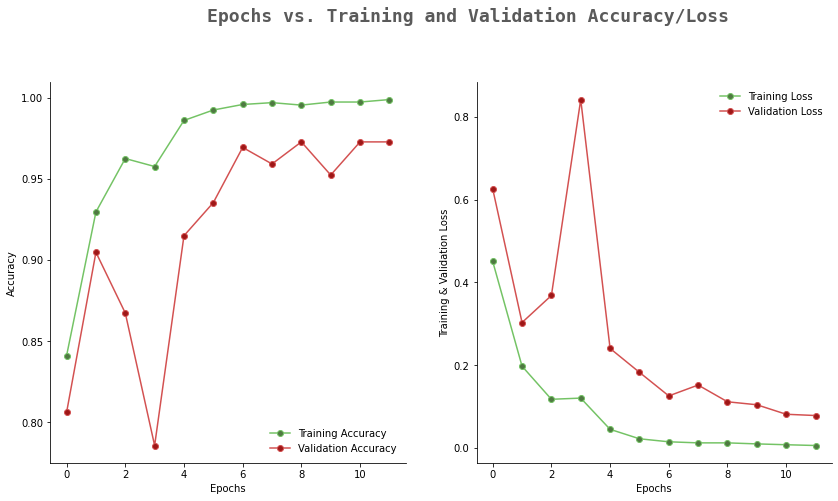

In [16]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

---

# Prediction

I've used the *argmax function* as each row from the prediction array contains four values for the respective labels. The **maximum** value which is in each row depicts the predicted output out of the 4 possible outcomes.<br>
So with *argmax*, I'm able to find out the index associated with the predicted outcome.

In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

---

# Evaluation

In this, <br>
0 - Glioma Tumor<br>
1 - No Tumor<br>
2 - Meningioma Tumor<br>
3 - Pituitary Tumor<br>

In [18]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.96      1.00      0.98        51
           2       0.98      0.98      0.98        96
           3       1.00      1.00      1.00        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



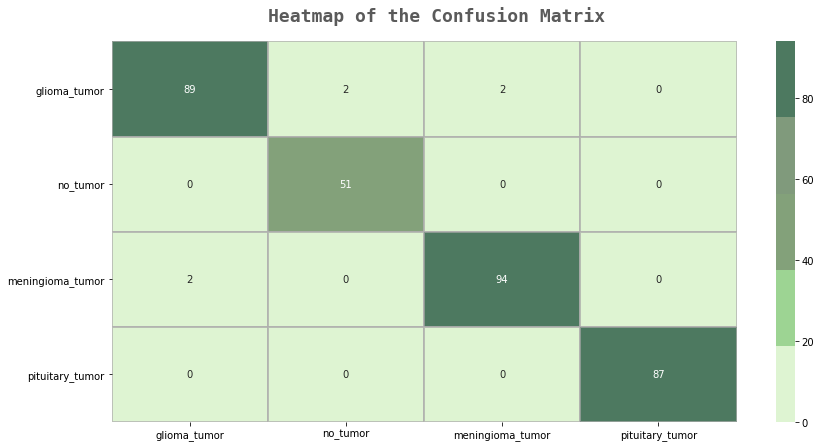

In [19]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

---

# Bonus Content: Widgets

I've made these Widgets in which we can upload images from our local machine and predict whether the MRI scan has a Brain Tumour or not and to classify which Tumor it is.<br>
Unfortunately, it doesn't work on Kaggle but you can play around with this by downloading the notebook on your machine :)

In [20]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

This is where you can upload the image by clicking on the **Upload** button:

In [21]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

After uploading the image, you can click on the **Predict** button below to make predictions:

In [22]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])